In [2]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import json


def plot_metrics(results_df, mmd_metrics, experiment_name):
    """
    Plot metrics with dynamic subplot layout.
    
    Args:
        results_df: DataFrame containing the results
        mmd_metrics: List of MMD metric names to plot
        experiment_name: Name of the experiment ("denoising-iterations" or "training-iterations")
    
    Returns:
        The matplotlib figure object
    """
    
    # Calculate number of plots needed (validity + polyscore + mmd metrics)
    n_plots = 2 + len(mmd_metrics)
    
    # Calculate grid dimensions (max 4 columns)
    n_cols = min(4, n_plots)
    n_rows = (n_plots + n_cols - 1) // n_cols  # Ceiling division
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(2.5*n_cols, 2*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    elif n_cols == 1:
        axes = axes.reshape(-1, 1)
    
    sns.set_palette("colorblind")
    colors = sns.color_palette("colorblind")
    
    # Plot validity
    ax = axes[0, 0]
    xlabel = "Number of Denoising Steps" if experiment_name == "denoising-iterations" else "Number of Epochs"
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Validity")
    ax.plot(
        results_df["num_steps"],
        results_df["validity"],
        color="#7e9ef7",
    )
    ax.yaxis.set_major_locator(plt.MaxNLocator(6))
    ax.set_ylim([0, 1])
    ax.set_title("Validity")
    
    # Plot polyscore
    ax = axes[0, 1]
    ax.set_xlabel(xlabel)
    ax.set_ylabel("PolyGraphScore")
    ax.plot(
        results_df["num_steps"],
        results_df["polyscore"],
        color="black",
    )
    ax.yaxis.set_major_locator(plt.MaxNLocator(6))
    ax.set_ylim([0, 1])
    ax.set_title("PolyGraphScore")
    
    # Plot MMD metrics
    descriptor_colors = {
        "orbit": colors[0],
        "degree": colors[1],
        "spectral": colors[2],
        "clustering": colors[3],
        "gin": colors[4],
    }
    
    for idx, metric in enumerate(mmd_metrics, start=2):
        row = idx // n_cols
        col = idx % n_cols
        ax = axes[row, col]
        
        ax.set_xlabel(xlabel)
        ax.set_ylabel("MMD²")
        color = next((color for key, color in descriptor_colors.items() if key in metric), "black")
        ax.plot(
            results_df["num_steps"],
            results_df[metric],
            color=color,
        )
        ax.yaxis.set_major_locator(plt.MaxNLocator(6))
        ax.set_title(metric.replace("_mmd", "").title() + " RBF")
    
    # Hide unused subplots
    for idx in range(n_plots, n_rows * n_cols):
        row = idx // n_cols
        col = idx % n_cols
        axes[row, col].set_visible(False)
    
    plt.tight_layout()
    return fig

,orbit_pgs,degree_pgs,spectral_pgs,clustering_pgs,gin_pgs,orbit_mmd,degree_mmd,spectral_mmd,clustering_mmd,gin_mmd,polyscore,validity,num_steps
0,0.998047,0.578125,0.980469,0.994141,0.617188,0.682818,0.082623,0.031451,0.481480,0.186503,0.998047,0.000000,15
1,0.953125,0.339844,0.783203,0.896484,0.410156,0.182710,0.029536,0.009828,0.118255,0.095966,0.953125,0.033203,30
2,0.841797,0.291016,0.595703,0.708984,0.333984,0.100474,0.024617,0.005137,0.064104,0.051761,0.841797,0.187500,45
3,0.748047,0.220703,0.507812,0.576172,0.265625,0.054278,0.017262,0.004196,0.035920,0.030209,0.748047,0.297852,60
4,0.619141,0.232422,0.380859,0.503906,0.265625,0.052700,0.018838,0.003197,0.035380,0.035231,0.619141,0.438477,75


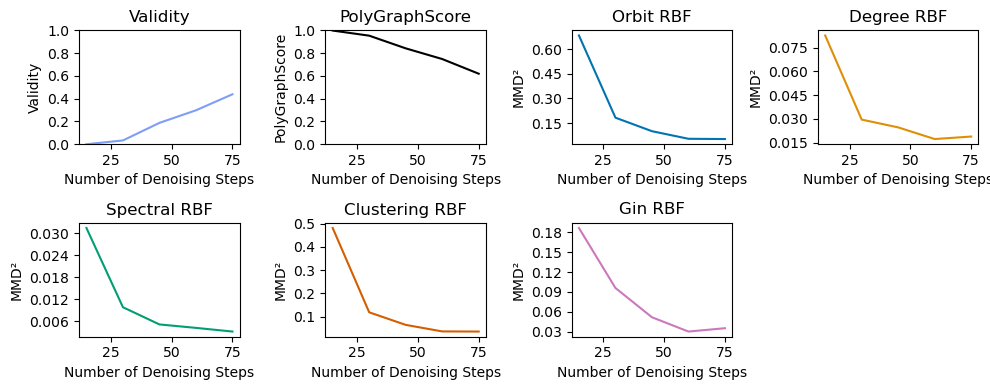

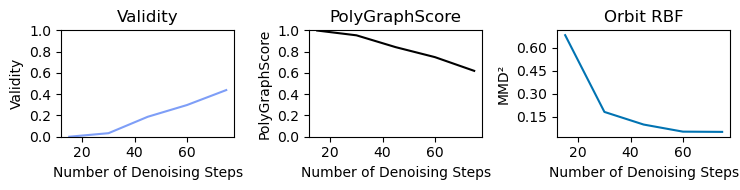

In [3]:
experiment = "denoising-iterations"

np.random.seed(42)
torch.manual_seed(42)


results = pd.read_csv(
    f"/fs/pool/pool-mlsb/polygraph/model-quality/{experiment}/results.csv"
)
display(results)
with open("/fs/pool/pool-mlsb/polygraph/rcparams.json", "r") as f:
    style = json.load(f)


# Define MMD metrics to plot
mmd_metrics = ["orbit_mmd", "degree_mmd", "spectral_mmd", "clustering_mmd", "gin_mmd"]

# Create and save the plot
fig = plot_metrics(results, mmd_metrics, experiment)
fig.savefig(
    f"/fs/pool/pool-mlsb/polygraph/model-quality/{experiment}/validity_polyscore_all_mmd.pdf",
    bbox_inches='tight'
)
plt.tight_layout()
plt.show()
plt.close(fig)

# Define MMD metrics to plot
brief_mmd_metrics = ["orbit_mmd",]

# Create and save the plot
fig = plot_metrics(results, brief_mmd_metrics, experiment)
fig.savefig(
    f"/fs/pool/pool-mlsb/polygraph/model-quality/{experiment}/validity_polyscore_brief_mmd.pdf",
    bbox_inches='tight'
)
plt.tight_layout()
plt.show()
plt.close(fig)